In [ ]:
from google.colab import files
uploaded = files.upload()


Saving drug.csv to drug.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('drug.csv')

df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df1.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df1.shape

(200, 6)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df1.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df1.duplicated().sum()

np.int64(0)

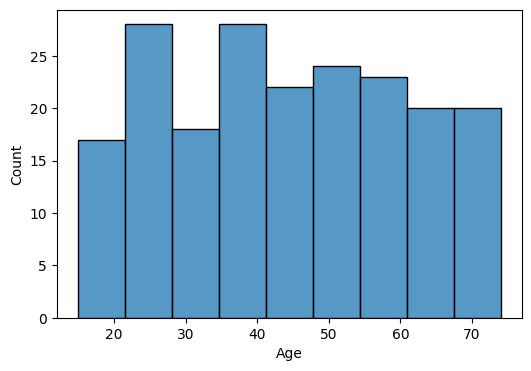

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df1['Age'])
plt.show()

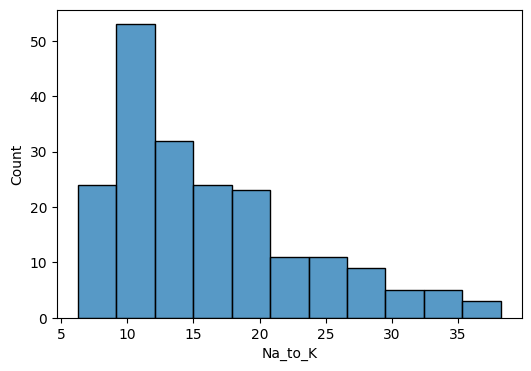

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df1['Na_to_K'])
plt.show()

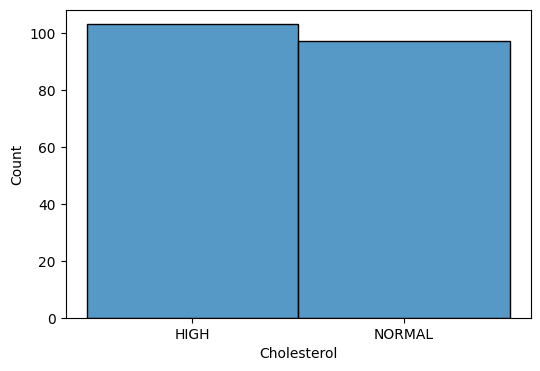

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df1['Cholesterol'])
plt.show()

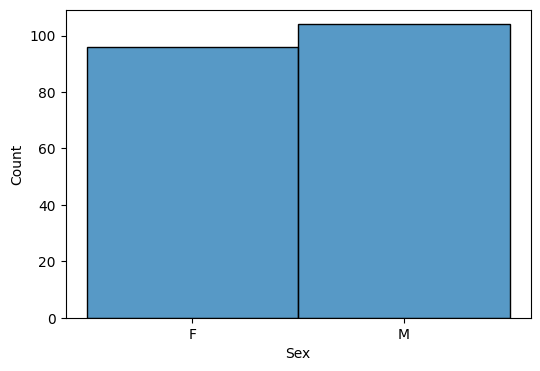

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df1['Sex'])
plt.show()

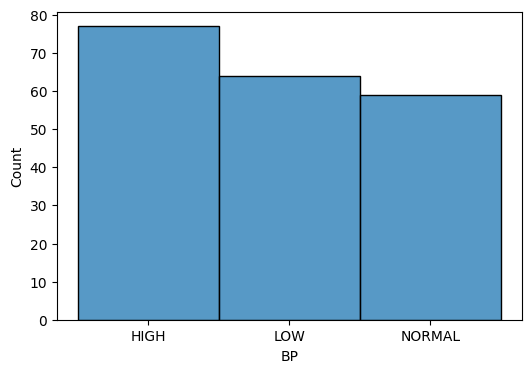

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df1['BP'])
plt.show()

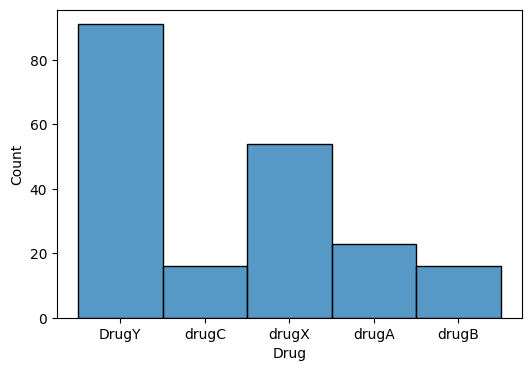

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df1['Drug'])
plt.show()

In [ ]:
Q1 = df1['Na_to_K'].quantile(0.25)
Q3 = df1['Na_to_K'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df1[(df1['Na_to_K'] < lower) | (df1['Na_to_K'] > upper)]
print(outliers)


     Age Sex    BP Cholesterol  Na_to_K   Drug
24    33   F   LOW        HIGH   33.486  DrugY
96    58   F   LOW        HIGH   38.247  DrugY
98    20   M  HIGH      NORMAL   35.639  DrugY
128   47   M   LOW      NORMAL   33.542  DrugY
131   52   M   LOW      NORMAL   32.922  DrugY
184   18   F  HIGH        HIGH   37.188  DrugY
188   65   M  HIGH      NORMAL   34.997  DrugY
194   46   F  HIGH        HIGH   34.686  DrugY


In [ ]:
X = df1.drop('Drug', axis=1)
y = df1['Drug']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



categorical_cols = ['Sex', 'BP', 'Cholesterol']
encoder = OneHotEncoder(drop="first", sparse_output=False)  # drop=first لتجنب dummy trap

encoded_array = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_array,
                          columns=encoder.get_feature_names_out(categorical_cols),
                          index=X.index)

In [ ]:
numeric_cols = ['Age','Na_to_K']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_processed = pd.concat([X[numeric_cols], encoded_df], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42,stratify=y_encoded)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y classes:", label_encoder.classes_)

X_train shape: (160, 6)
X_test shape: (40, 6)
y classes: ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']


In [ ]:
scaler = StandardScaler()
X_train[["Age", "Na_to_K"]] = scaler.fit_transform(X_train[["Age", "Na_to_K"]])
X_test[["Age", "Na_to_K"]] = scaler.transform(X_test[["Age", "Na_to_K"]])



===== Logistic Regression =====
Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.80      0.89         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.93        40
   macro avg       0.97      0.88      0.91        40
weighted avg       0.94      0.93      0.92        40



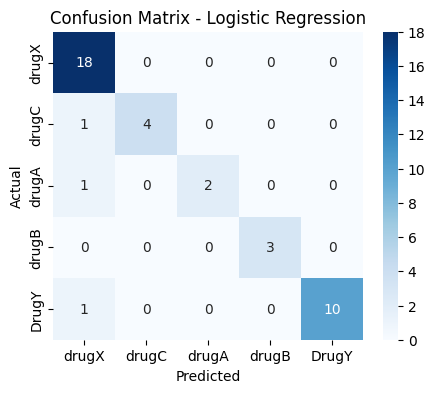


===== Decision Tree =====
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



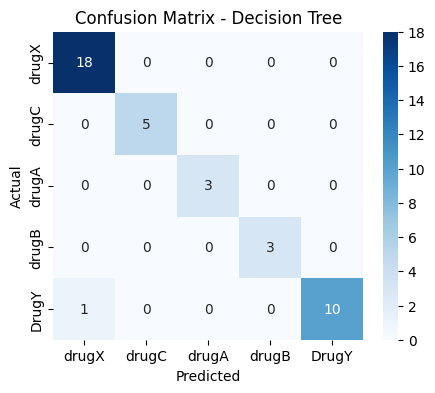


===== Random Forest =====
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



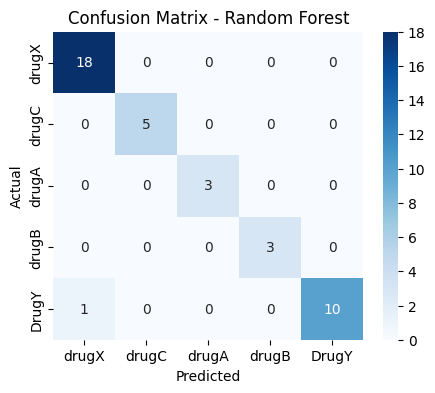


📊 Accuracy Comparison:
Logistic Regression: 0.9250
Decision Tree: 0.9750
Random Forest: 0.9750


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(df1["Drug"]), yticklabels=set(df1["Drug"]))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


print("\n📊 Accuracy Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")